In [118]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.optimizers import Adam
from keras import regularizers
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import os
from datetime import datetime
from sklearn.metrics import roc_auc_score as auc 
import prince


In [119]:
import matplotlib.pyplot as plt
%matplotlib inline
from bokeh.plotting import figure, output_notebook, show, ColumnDataSource
from bokeh.models import HoverTool, NumeralTickFormatter
from bokeh.palettes import Set3_12
from bokeh.transform import jitter

In [122]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import collections
from tqdm import tqdm, tqdm_notebook

# PyTorch Packages
import torch.nn as nn
from torch.autograd import Variable as V
import torch.nn.functional as F
import torch
from torch.utils.data import DataLoader

# SKLearn Packages
from sklearn.preprocessing import StandardScaler

from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score)
from sklearn.metrics import accuracy_score, precision_score


C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [123]:
df = pd.read_csv('aml.csv', sep=',', encoding = "ISO-8859-1")

In [100]:
df.shape

(15120, 56)

In [86]:
filter_col = [col for col in df if col.startswith('Soil')]

In [90]:
df2 = df[filter_col]

In [357]:
%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [358]:
df.isnull().values.any()

False

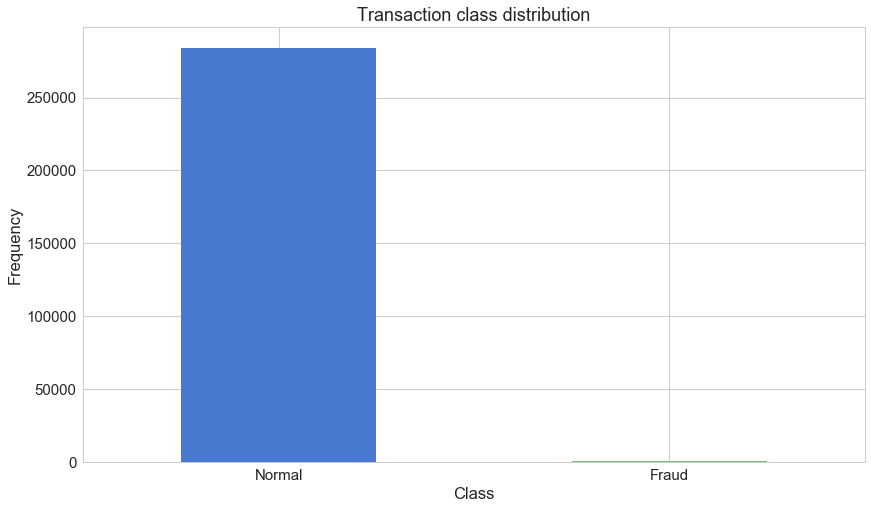

In [360]:
count_classes = pd.value_counts(df['isFraud'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [361]:
frauds = df[df.Class == 1]
normal = df[df.Class == 0]

In [362]:
frauds.shape[0]/normal.shape[0]

0.0017304750013189597

In [8]:
df=df.drop(['step'], axis=1)

In [9]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,countryOrig,ownerOrig,countryDest
0,PAYMENT,9839.640,C1231006815,170136.000,160296.360,M1979787155,0.000,0.000,0,0,Mexico,Thailand,Denmark
1,PAYMENT,1864.280,C1666544295,21249.000,19384.720,M2044282225,0.000,0.000,0,0,Fiji,Kuwait,Norway
2,TRANSFER,181.000,C1305486145,181.000,0.000,C553264065,0.000,0.000,1,0,Ecuador,Ecuador,Norway
3,CASH_OUT,181.000,C840083671,181.000,0.000,C38997010,21182.000,0.000,1,0,Syria,Syria,Denmark
4,PAYMENT,11668.140,C2048537720,41554.000,29885.860,M1230701703,0.000,0.000,0,0,Sri Lanka,Japan,Norway


In [67]:
frauds.amount.describe()

count       1142.000
mean     1192628.932
std      2030598.964
min          119.000
25%        86070.170
50%       353179.450
75%      1248759.002
max     10000000.000
Name: amount, dtype: float64

In [68]:
normal.amount.describe()

count   1047433.000
mean     157539.663
std      254188.285
min           0.100
25%       12134.870
50%       76214.970
75%      213492.750
max     6419835.270
Name: amount, dtype: float64

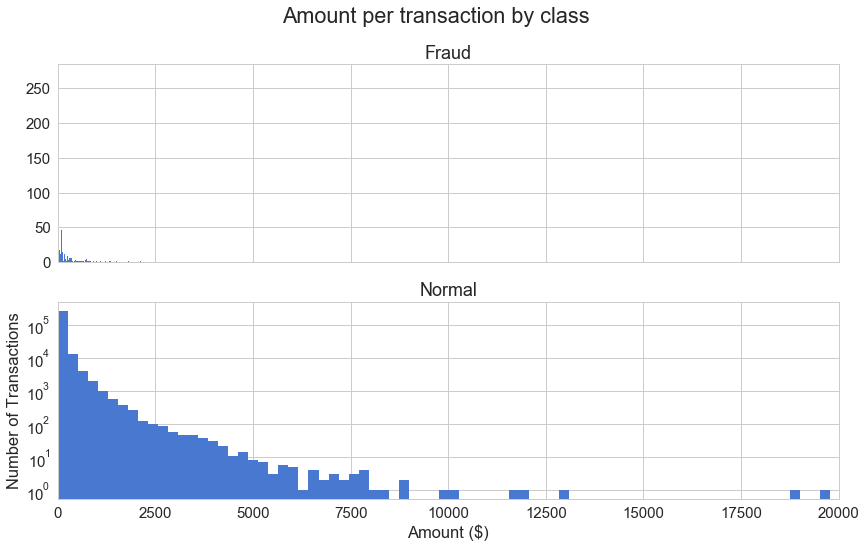

In [367]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

bins = 100

ax1.hist(frauds.amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal.amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000000))
plt.yscale('log')
plt.show();

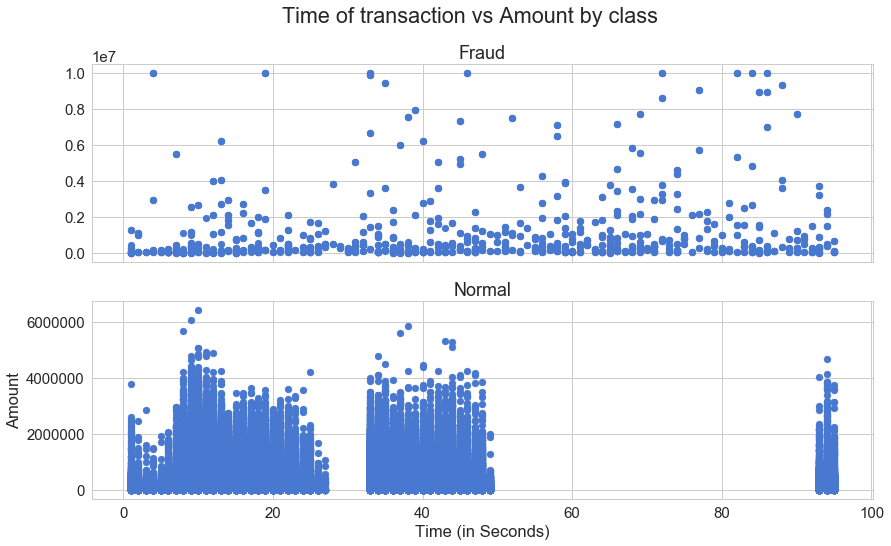

In [70]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(frauds.step, frauds.amount)
ax1.set_title('Fraud')

ax2.scatter(normal.step, normal.amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [71]:
df= df.drop(['step'], axis=1)

In [10]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,countryOrig,ownerOrig,countryDest
0,PAYMENT,9839.640,C1231006815,170136.000,160296.360,M1979787155,0.000,0.000,0,0,Mexico,Thailand,Denmark
1,PAYMENT,1864.280,C1666544295,21249.000,19384.720,M2044282225,0.000,0.000,0,0,Fiji,Kuwait,Norway
2,TRANSFER,181.000,C1305486145,181.000,0.000,C553264065,0.000,0.000,1,0,Ecuador,Ecuador,Norway
3,CASH_OUT,181.000,C840083671,181.000,0.000,C38997010,21182.000,0.000,1,0,Syria,Syria,Denmark
4,PAYMENT,11668.140,C2048537720,41554.000,29885.860,M1230701703,0.000,0.000,0,0,Sri Lanka,Japan,Norway


In [17]:
df.shape

(1048575, 13)

In [11]:
X = df.drop(columns=['amount','oldbalanceOrg','newbalanceOrig',
                'oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud','nameOrig','nameDest'], index=1)

In [49]:
X.to_csv('collabtest.csv')

In [65]:
d = pd.read_csv('collabtest.csv')

In [66]:
d.head()

,Unnamed: 0,type,countryOrig,ownerOrig,countryDest
0,0,PAYMENT,Mexico,Thailand,Denmark
1,2,TRANSFER,Ecuador,Ecuador,Norway
2,3,CASH_OUT,Syria,Syria,Denmark
3,4,PAYMENT,Sri Lanka,Japan,Norway
4,5,PAYMENT,Czech Republic,Finland,Norway


In [67]:
d = d.drop(['type','countryOrig','ownerOrig'], axis=1)

In [104]:
df= df.drop('Unnamed: 0',axis=1)

In [106]:
d.shape

(1048574, 1)

In [420]:
X = X.drop('Unnamed: 0', axis=1)

In [35]:
X_sample = X.sample(n=20, random_state=42)

In [112]:
df.head()

,type,countryOrig,ownerOrig,countryDest
0,PAYMENT,Mexico,Thailand,Denmark
1,TRANSFER,Ecuador,Ecuador,Norway
2,CASH_OUT,Syria,Syria,Denmark
3,PAYMENT,Sri Lanka,Japan,Norway
4,PAYMENT,Czech Republic,Finland,Norway


In [36]:
X_sample.shape

(20, 4)

In [92]:
import mca

In [110]:
x_dummy = mca.dummy(df)

In [75]:
import sys

In [76]:
sys.getsizeof(x_dummy.shape).

64

In [113]:
x_dummy.head()

type                                 countryOrig                    \
  CASH_IN CASH_OUT DEBIT PAYMENT TRANSFER     Algeria Australia Bahrain   
0       0        0     0       1        0           0         0       0   
1       0        0     0       0        1           0         0       0   
2       0        1     0       0        0           0         0       0   
3       0        0     0       1        0           0         0       0   
4       0        0     0       1        0           0         0       0   

                     ...   ownerOrig                                       \
  Bangladesh Belize  ...      Taiwan Tanzania Thailand Turkey USA Vietnam   
0          0      0  ...           0        0        1      0   0       0   
1          0      0  ...           0        0        0      0   0       0   
2          0      0  ...           0        0        0      0   0       0   
3          0      0  ...           0        0        0      0   0       0   
4          0      0  ...           0        0        0      0   0       0   

        countryDest                
  Yemen     Denmark Norway Sweden  
0     0           1      0      0  
1     0           0      1      0  
2     0           1      0      0  
3     0           0      1      0  
4     0           0      1      0  

[5 rows x 137 columns]

In [99]:
df2.shape

(15120, 40)

In [117]:
mca_ben = mca.MCA(x_dummy, benzecri=False).fs_r()

MemoryError: 

In [41]:
mca_ben

In [380]:
mca = prince.MCA(n_components=2,
                n_iter=3,
                copy=True,
                engine='auto',
                random_state=42)

In [382]:
mca.fit(x_dummy)

MCA(copy=True, engine='auto', n_components=2, n_iter=3, random_state=42)

In [94]:
test=mca_ben.fs_r()

In [95]:
frutt = pd.DataFrame(test)

In [96]:
test.shape

(15120, 34)

In [101]:
frutt.describe()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
count,15120.000,15120.000,15120.000,15120.000,15120.000,15120.000,15120.000,15120.000,15120.000,15120.000,...,15120.000,15120.000,15120.000,15120.000,15120.000,15120.000,15120.000,15120.000,15120.000,15120.000
mean,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,...,-0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-3.005,-9.394,-6.449,-2.615,-10.004,-2.497,-1.923,-6.825,-6.012,-13.360,...,-24.058,-22.061,-5.749,-3.550,-4.776,-1.694,-15.838,-11.985,-4.123,-24.122
25%,-0.425,-0.690,0.155,-0.317,-0.596,-0.626,-0.200,-0.351,-0.477,-0.400,...,-0.041,-0.367,-0.036,-0.041,-0.154,-0.162,-0.023,-0.122,-0.464,-0.403
50%,-0.112,-0.380,0.155,-0.044,-0.047,-0.465,0.083,-0.191,0.041,0.018,...,-0.001,-0.111,0.015,0.100,0.015,-0.019,0.000,0.002,-0.084,0.017
75%,0.451,0.620,0.155,0.274,0.373,0.590,0.460,0.423,0.406,0.394,...,0.061,0.380,0.184,0.333,0.107,0.219,0.101,0.239,0.108,0.303
max,5.878,2.086,0.155,2.492,7.004,2.667,6.580,15.555,10.434,2.378,...,9.207,3.336,12.847,8.531,24.639,23.009,6.021,6.588,11.854,10.764


# Initial pre-processing

In [73]:
from sklearn.preprocessing import OneHotEncoder

In [74]:
enc = OneHotEncoder(handle_unknown='ignore')

In [75]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,countryOrig,ownerOrig,countryDest
0,PAYMENT,9839.640,C1231006815,170136.000,160296.360,M1979787155,0.000,0.000,0,0,Mexico,Thailand,Denmark
1,PAYMENT,1864.280,C1666544295,21249.000,19384.720,M2044282225,0.000,0.000,0,0,Fiji,Kuwait,Norway
2,TRANSFER,181.000,C1305486145,181.000,0.000,C553264065,0.000,0.000,1,0,Ecuador,Ecuador,Norway
3,CASH_OUT,181.000,C840083671,181.000,0.000,C38997010,21182.000,0.000,1,0,Syria,Syria,Denmark
4,PAYMENT,11668.140,C2048537720,41554.000,29885.860,M1230701703,0.000,0.000,0,0,Sri Lanka,Japan,Norway


In [76]:
df=df.set_index([df['nameOrig'],df['nameDest']])

In [77]:
cat_type = pd.get_dummies(df['type'])
cat_country_origin = pd.get_dummies(df['countryOrig'])
cat_country_dest = pd.get_dummies(df['countryDest'])
cat_owner_orig = pd.get_dummies(df['ownerOrig'])

In [78]:
remove = ['type','countryOrig','ownerOrig','countryDest']

In [79]:
df = df.drop(remove, axis=1)

In [80]:
df.head()

,,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
nameOrig,nameDest,,,,,,,,,
C1231006815,M1979787155,9839.640,C1231006815,170136.000,160296.360,M1979787155,0.000,0.000,0,0
C1666544295,M2044282225,1864.280,C1666544295,21249.000,19384.720,M2044282225,0.000,0.000,0,0
C1305486145,C553264065,181.000,C1305486145,181.000,0.000,C553264065,0.000,0.000,1,0
C840083671,C38997010,181.000,C840083671,181.000,0.000,C38997010,21182.000,0.000,1,0
C2048537720,M1230701703,11668.140,C2048537720,41554.000,29885.860,M1230701703,0.000,0.000,0,0


In [81]:
from mca import *

In [82]:
caty=pd.concat([cat_type, cat_country_dest,cat_country_origin,cat_owner_orig],axis=1)

In [83]:
caty.shape

(1048575, 137)

In [84]:
mca_ben = MCA(caty, ncols=137)

MemoryError: 

In [85]:
df.head()

,,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
nameOrig,nameDest,,,,,,,,,
C1231006815,M1979787155,9839.640,C1231006815,170136.000,160296.360,M1979787155,0.000,0.000,0,0
C1666544295,M2044282225,1864.280,C1666544295,21249.000,19384.720,M2044282225,0.000,0.000,0,0
C1305486145,C553264065,181.000,C1305486145,181.000,0.000,C553264065,0.000,0.000,1,0
C840083671,C38997010,181.000,C840083671,181.000,0.000,C38997010,21182.000,0.000,1,0
C2048537720,M1230701703,11668.140,C2048537720,41554.000,29885.860,M1230701703,0.000,0.000,0,0


In [86]:
df2=pd.concat([df,cat_type, cat_country_dest,cat_country_origin,cat_owner_orig],axis=1)

In [87]:
df2.CASH_IN.unique()

array([0, 1], dtype=uint64)

In [88]:
df2.head()

,,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,...,Sweden,Syria,São Tomé-et-Príncipe,Taiwan,Tanzania,Thailand,Turkey,USA,Vietnam,Yemen
nameOrig,nameDest,,,,,,,,,,,,,,,,,,,,,
C1231006815,M1979787155,9839.640,C1231006815,170136.000,160296.360,M1979787155,0.000,0.000,0,0,0,...,0,0,0,0,0,1,0,0,0,0
C1666544295,M2044282225,1864.280,C1666544295,21249.000,19384.720,M2044282225,0.000,0.000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C1305486145,C553264065,181.000,C1305486145,181.000,0.000,C553264065,0.000,0.000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
C840083671,C38997010,181.000,C840083671,181.000,0.000,C38997010,21182.000,0.000,1,0,0,...,0,1,0,0,0,0,0,0,0,0
C2048537720,M1230701703,11668.140,C2048537720,41554.000,29885.860,M1230701703,0.000,0.000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
df2 = df2.set_index(['nameOrig','nameDest'])

In [90]:
df2.head()

,,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,...,Sweden,Syria,São Tomé-et-Príncipe,Taiwan,Tanzania,Thailand,Turkey,USA,Vietnam,Yemen
nameOrig,nameDest,,,,,,,,,,,,,,,,,,,,,
C1231006815,M1979787155,9839.640,170136.000,160296.360,0.000,0.000,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
C1666544295,M2044282225,1864.280,21249.000,19384.720,0.000,0.000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C1305486145,C553264065,181.000,181.000,0.000,0.000,0.000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C840083671,C38997010,181.000,181.000,0.000,21182.000,0.000,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
C2048537720,M1230701703,11668.140,41554.000,29885.860,0.000,0.000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
from sklearn.preprocessing import MinMaxScaler

In [92]:
scaler = MinMaxScaler()

In [93]:
df2[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']] = scaler.fit_transform(df2[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']])

In [94]:
israud = df2['isFraud']

In [95]:
df2=df2.drop(['isFraud'],axis=1)

In [96]:
df2.head()

,,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,...,Sweden,Syria,São Tomé-et-Príncipe,Taiwan,Tanzania,Thailand,Turkey,USA,Vietnam,Yemen
nameOrig,nameDest,,,,,,,,,,,,,,,,,,,,,
C1231006815,M1979787155,0.001,0.004,0.004,0.000,0.000,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
C1666544295,M2044282225,0.000,0.001,0.000,0.000,0.000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
C1305486145,C553264065,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C840083671,C38997010,0.000,0.000,0.000,0.001,0.000,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
C2048537720,M1230701703,0.001,0.001,0.001,0.000,0.000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [97]:
df2.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,...,Sweden,Syria,São Tomé-et-Príncipe,Taiwan,Tanzania,Thailand,Turkey,USA,Vietnam,Yemen
count,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,...,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000
mean,0.016,0.022,0.023,0.023,0.026,0.000,0.217,0.356,0.007,0.337,...,0.020,0.000,0.000,0.019,0.000,0.019,0.000,0.019,0.000,0.000
std,0.026,0.076,0.077,0.055,0.057,0.000,0.412,0.479,0.082,0.473,...,0.139,0.009,0.009,0.138,0.008,0.138,0.009,0.136,0.009,0.009
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.008,0.000,0.000,0.003,0.005,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.021,0.004,0.004,0.022,0.027,0.000,0.000,1.000,0.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,1.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


# PCA pre-processing

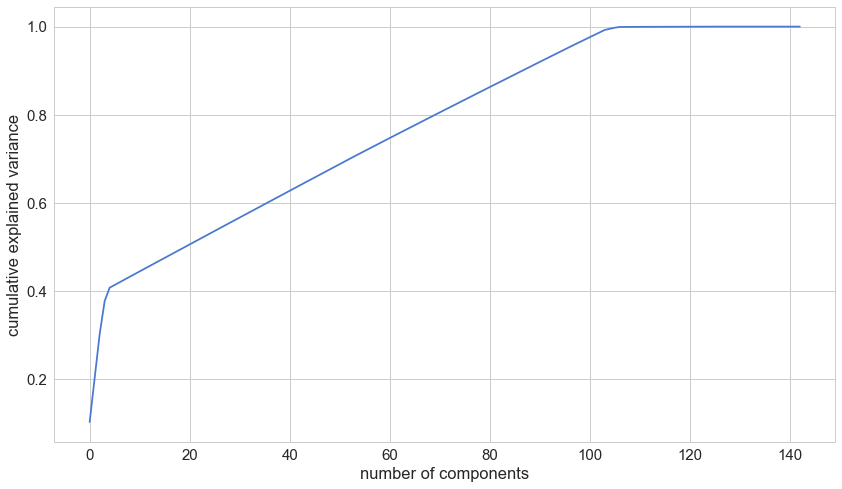

In [98]:
from sklearn.decomposition import PCA
pca = PCA().fit(df2)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [99]:


pca = PCA(n_components=100)

principalComponents = pca.fit_transform(df2)



In [100]:
principalComponents.shape

(1048575, 100)

In [101]:
fraud = df.isFraud

In [102]:
fraud=fraud.reset_index()

In [103]:
fraud=fraud.drop(['nameOrig','nameDest'], axis=1)

In [104]:
fraud.head()

,isFraud
0,0
1,0
2,1
3,1
4,0


In [105]:
principalDf = pd.DataFrame(data = principalComponents)

In [106]:
df2['isFraud'] = israud

In [107]:
principalDf['isFraud'] = fraud

In [108]:
principalDf.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,isFraud
0,-0.685,0.695,-0.459,-0.340,-0.081,0.002,-0.004,-0.002,-0.013,-0.018,...,0.004,-0.058,-0.002,0.005,-0.009,-0.031,-0.022,-0.005,-0.013,0
1,-0.640,-0.721,-0.481,-0.344,-0.080,-0.034,0.004,-0.010,-0.042,-0.045,...,-0.015,-0.006,0.004,-0.011,-0.012,-0.017,-0.004,-0.007,0.000,0
2,0.039,-0.702,-0.419,0.164,1.043,0.000,-0.000,0.001,-0.000,-0.000,...,0.001,-0.001,-0.000,-0.000,0.000,-0.000,0.001,0.002,-0.000,1
3,0.720,0.736,-0.314,-0.283,-0.077,0.000,0.000,-0.000,-0.000,-0.000,...,0.001,0.001,0.001,0.001,0.001,0.001,0.002,0.001,0.001,1
4,-0.640,-0.721,-0.481,-0.345,-0.082,-0.010,-0.009,-0.004,-0.004,0.008,...,-0.085,-0.093,0.006,-0.004,-0.012,-0.019,-0.029,-0.039,-0.029,0


## Ready for training

In [49]:
df2['isFraud'] = df['isFraud']

In [87]:
df2.head()

,,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,...,Syria,São Tomé-et-Príncipe,Taiwan,Tanzania,Thailand,Turkey,USA,Vietnam,Yemen,isFraud
nameOrig,nameDest,,,,,,,,,,,,,,,,,,,,,
C1231006815,M1979787155,0.001,0.004,0.004,0.000,0.000,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
C1666544295,M2044282225,0.000,0.001,0.000,0.000,0.000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
C1305486145,C553264065,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
C840083671,C38997010,0.000,0.000,0.000,0.001,0.000,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
C2048537720,M1230701703,0.001,0.001,0.001,0.000,0.000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Pytorch implementation 

In [193]:
X_train, X_test = train_test_split(df2, test_size=0.3, random_state=RANDOM_SEED)
X_train = X_train[X_train.isFraud == 0]


X_train.isFraud.unique()

X_train = X_train.drop(['isFraud'], axis=1)

X_train.shape

y_test = X_test['isFraud']

y_test.sum()

X_test = X_test.drop(['isFraud'], axis=1)

X_test.shape

X_train.shape

X_test.head()

X_train = X_train.values
X_test = X_test.values

X_train

array([[1.93928702e-03, 4.40651022e-03, 3.90779770e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.27752764e-02, 1.18132204e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.28110406e-03, 2.48253684e-01, 2.49823047e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.46261082e-02, 6.37348924e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.12966495e-02, 5.19524890e-04, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00556101e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [194]:
xt = torch.FloatTensor(X_train)
xtr = torch.FloatTensor(X_test)
xdl = DataLoader(xt,batch_size = 1000)
tdl = DataLoader(xtr, batch_size = 1000)

In [213]:
class Net1(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(143,71)
        self.lin2 = nn.Linear(71,25)
        self.lin7 = nn.Linear(25,71)
        self.lin8 = nn.Linear(71,143)
        
        self.drop2 = nn.Dropout(0.05)
        
        self.lin1.weight.data.uniform_(-2,2)
        self.lin2.weight.data.uniform_(-2,2)
        self.lin7.weight.data.uniform_(-2,2)
        self.lin8.weight.data.uniform_(-2,2)

    def forward(self, data):
        x = F.relu(self.lin1(data))
        x = self.drop2(F.relu(self.lin2(x)))
        x = F.relu(self.lin7(x))
        x = self.lin8(x)
        
        return (x)

In [214]:
def score(x):
    y_pred = model(V(x))
    x1 = V(x)
    return loss(y_pred,x1).data[0]

In [215]:
# Utilize a named tuple to keep track of scores at each epoch
model_hist = collections.namedtuple('Model','epoch loss val_loss')
model_loss = model_hist(epoch = [], loss = [], val_loss = [])

In [216]:
def train(epochs, model, model_loss):
    try:c = model_loss.epoch[-1]
    except: c = 0
    for epoch in tqdm_notebook(range(epochs),position=0, total = epochs):
        losses=[]
        dl = iter(xdl)
        for t in range(len(dl)):
            # Forward pass: compute predicted y and loss by passing x to the model.
            xt = next(dl)
            y_pred = model(V(xt))
            
            l = loss(y_pred,V(xt))
            losses.append(l)
            optimizer.zero_grad()

            # Backward pass: compute gradient of the loss with respect to model parameters
            l.backward()

            # Calling the step function on an Optimizer makes an update to its parameters
            optimizer.step()
    
        val_dl = iter(tdl)
        val_scores = [score(next(val_dl)) for i in range(len(val_dl))]
        
        model_loss.epoch.append(c+epoch)
        model_loss.loss.append(l.data[0])
        model_loss.val_loss.append(np.mean(val_scores))
        print(f'Epoch: {epoch}   Loss: {l.data[0]:.4f}    Val_Loss: {np.mean(val_scores):.4f}')

In [221]:
model = Net1()
loss=nn.MSELoss()
learning_rate = 0.00001
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate)

In [222]:
train(model = model, epochs = 30,model_loss= model_loss)

HBox(children=(IntProgress(value=0, max=30), HTML(value='')))

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  after removing the cwd from sys.path.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:26: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:28: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch: 0   Loss: 178332.6719    Val_Loss: 166353.2500
Epoch: 1   Loss: 151010.4688    Val_Loss: 142187.0312
Epoch: 2   Loss: 130064.9766    Val_Loss: 122453.6250
Epoch: 3   Loss: 112722.8750    Val_Loss: 105963.5781
Epoch: 4   Loss: 98681.9453    Val_Loss: 91924.6953
Epoch: 5   Loss: 85919.4922    Val_Loss: 79942.0859
Epoch: 6   Loss: 74669.7578    Val_Loss: 69581.2188
Epoch: 7   Loss: 65201.8906    Val_Loss: 60612.0273
Epoch: 8   Loss: 56983.2031    Val_Loss: 52797.9180
Epoch: 9   Loss: 49916.0703    Val_Loss: 45990.0195
Epoch: 10   Loss: 43374.8750    Val_Loss: 40043.7383
Epoch: 11   Loss: 37800.9727    Val_Loss: 34867.1055
Epoch: 12   Loss: 33207.1328    Val_Loss: 30347.7402
Epoch: 13   Loss: 28249.1367    Val_Loss: 26380.8887
Epoch: 14   Loss: 25300.7441    Val_Loss: 22914.2930
Epoch: 15   Loss: 21780.4062    Val_Loss: 19857.0391
Epoch: 16   Loss: 18829.4746    Val_Loss: 17210.8652
Epoch: 17   Loss: 16554.2207    Val_Loss: 14870.5020
Epoch: 18   Loss: 14433.5166    Val_Loss: 12830.

In [224]:
def format_plot(p, x_label, y_label):
    p.grid.grid_line_color = None
    p.background_fill_color = "whitesmoke"
    p.axis.minor_tick_line_color = None
    p.title.align = 'center'
    p.title.text_font_size = "18px"
    p.xaxis.axis_label = x_label
    p.yaxis.axis_label = y_label
    p.xaxis.axis_label_text_font_size = "14px"
    p.yaxis.axis_label_text_font_size = "14px"
    p.yaxis.axis_line_color = None
    p.yaxis.major_tick_line_color = None
    p.axis.major_label_text_font_size = "12px"
    return p

In [225]:
# Define a plot source
source = ColumnDataSource(data=dict(
    x=model_loss.epoch,
    loss=model_loss.loss,
    val_loss = model_loss.val_loss
))

p = figure(plot_height = 500, 
           plot_width = 800,
           toolbar_location = None, 
           title = "Model L1 Loss")

ml = p.line(x = "x", y = "loss", 
           color=Set3_12[4], 
           line_width = 2, 
           legend = "Training Loss", 
           source=source)

p.line(x = "x", y = "val_loss", 
       color=Set3_12[5], 
       line_width = 2, 
       legend = "Validation Loss",
       source=source)


tips = [
    ("Epoch","@x"),
    ("Model Loss","@loss{0.000}"),
    ("Val Loss","@val_loss{0.000}")
]
p.add_tools(HoverTool(tooltips=tips, 
                      renderers= [ml], 
                      mode='vline'))


p = format_plot(p, 'Epoch', 'Loss')

show(p);

C:\Anaconda\lib\site-packages\bokeh\core\json_encoder.py:80: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(type(obj), np.float):


TypeError: Object of type 'Tensor' is not JSON serializable

In [79]:
# Iterate through the dataloader and get predictions for each batch of the test set.
p = iter(tdl)
preds = np.vstack([model(V(next(p))).cpu().data.numpy() for i in range(len(p))])

# Create a pandas DF that shows the Autoencoder MSE vs True Labels
error = np.mean(np.power((X_test - preds),2), axis = 1)
error_df = pd.DataFrame(data = {'error':error,'true':y_test})

error_df.groupby('true')['error'].describe().reset_index()

C:\Anaconda\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


,true,count,mean,std,min,25%,50%,75%,max
0,0,314224.000,0.030,0.005,0.015,0.027,0.029,0.034,0.043
1,1,349.000,0.014,0.006,0.007,0.007,0.008,0.020,0.021


In [80]:
fpr, tpr, thresholds = roc_curve(error_df.true, error_df.error)
roc_auc = auc(fpr, tpr)

source = ColumnDataSource(data=dict(
    fpr = fpr,
    tpr = tpr,
    x = np.linspace(0,1,len(fpr)),
    y = np.linspace(0,1,len(fpr))
))

p = figure(plot_height = 500, plot_width = 500,
           toolbar_location = None, 
           title = "Receiver Operating Characteristic")

j = p.line(x = "x", y = "y", 
           color=Set3_12[3], 
           line_width = 2, 
           line_dash = 'dashed', 
           source=source)

k = p.line(x = "fpr", y = "tpr", 
           color=Set3_12[4], 
           line_width = 2, 
           legend = f'AUC = {roc_auc:0.4f}',
           source=source)

tips= [
    ("False-Pos", "@fpr{00.0%}"),
    ("True-Pos", "@tpr{00.0%}"),
    ]
p.add_tools(HoverTool(tooltips=tips, renderers=[k], mode='vline'))

p = format_plot(p, 'False Positive Rate', 'True Positive Rate')
p.legend.location = 'bottom_right'

show(p);

C:\Anaconda\lib\site-packages\bokeh\core\json_encoder.py:80: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(type(obj), np.float):


TypeError: Object of type 'Tensor' is not JSON serializable

In [81]:
temp_df = error_df[error_df['true'] == 0]
threshold = temp_df['error'].mean() + temp_df['error'].std()
print(f'Threshold: {threshold:.3f}')

Threshold: 0.035


In [82]:
y_pred = [1 if e > threshold else 0 for e in error_df.error.values]
print(classification_report(error_df.true.values,y_pred))

             precision    recall  f1-score   support

          0       1.00      0.78      0.88    314224
          1       0.00      0.00      0.00       349

avg / total       1.00      0.78      0.88    314573



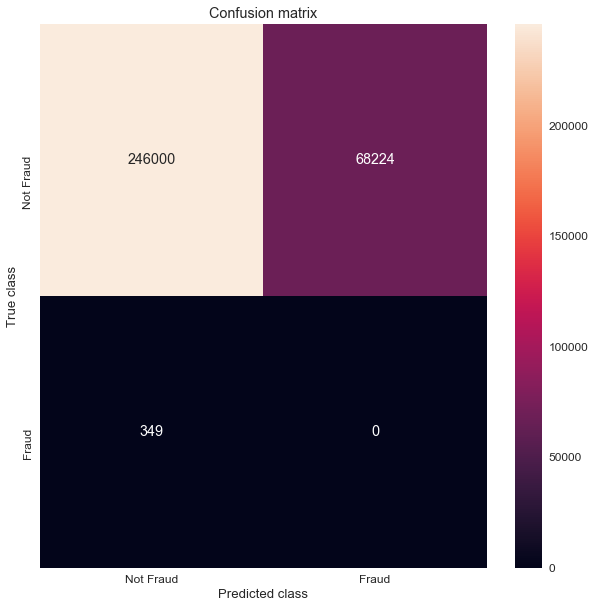

In [83]:
conf_matrix = confusion_matrix(error_df.true, y_pred)

sns.set(font_scale = 1.2)
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, xticklabels=['Not Fraud','Fraud'], yticklabels=['Not Fraud','Fraud'], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

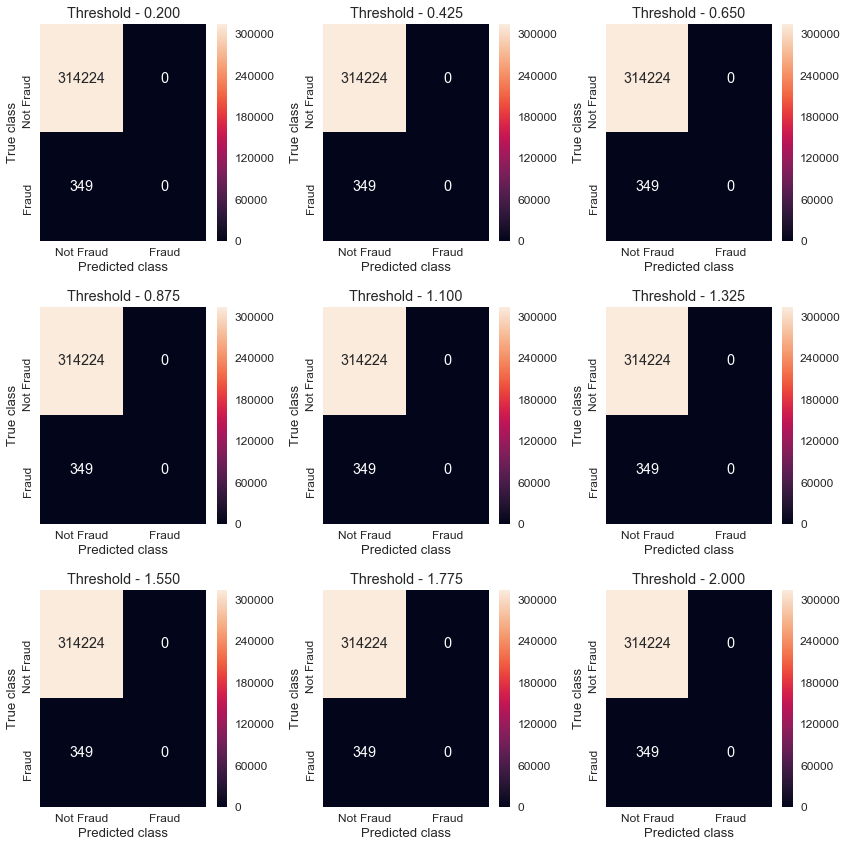

In [84]:
plt.figure(figsize=(12, 12))
m = []
for thresh in np.linspace(0.2,2,9):
    y_pred = [1 if e > thresh else 0 for e in error_df.error.values]
    conf_matrix = confusion_matrix(error_df.true, y_pred)
    m.append((conf_matrix,thresh))
    
count = 0
for i in range(3):
    for j in range(3):
        plt.subplot2grid((3, 3), (i, j))
        sns.heatmap(m[count][0], xticklabels=['Not Fraud','Fraud'], yticklabels=['Not Fraud','Fraud'], annot=True, fmt="d");
        plt.title(f"Threshold - {m[count][1]:.3f}")
        plt.ylabel('True class')
        plt.xlabel('Predicted class')
        plt.tight_layout()
        count += 1
plt.show()

In [85]:
thr = []
tp = []
fn = []
fp = []
tn = []
for thresh in np.linspace(0.2,3,200):
    y_pred = [1 if e > thresh else 0 for e in error_df.error.values]
    conf = confusion_matrix(error_df.true, y_pred)
    tp.append(conf[0][0])
    fp.append(conf[0][1])
    fn.append(conf[1][0])
    tn.append(conf[1][1])
    thr.append(thresh)

conf_df = pd.DataFrame(data = {'fp':fp,'fn':fn,'threshold':thr})
cdf = conf_df.drop_duplicates(subset='fn',keep='last')
print(cdf)

xx = [str(x) for x in cdf['fn'].values]
source = ColumnDataSource(data=dict(
    fn = xx,
    fp = cdf['fp'].values,
))

p = figure(plot_width = 800,
           toolbar_location = None, x_range = xx,
           title = "False Negative vs False Positive")

p.vbar(x = "fn", top = "fp", width = 0.9,
           color=Set3_12[3],  
           source=source)

p = format_plot(p, 'False Negatives', 'False Positive')

show(p);

     fp   fn  threshold
199   0  349      3.000


C:\Anaconda\lib\site-packages\bokeh\core\json_encoder.py:80: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(type(obj), np.float):


TypeError: Object of type 'Tensor' is not JSON serializable

# Tensorflow implementation

In [51]:
TEST_RATIO = 0.25

TRA_INDEX = int((1-TEST_RATIO) * principalDf.shape[0])
train_x = principalDf.iloc[:TRA_INDEX, 1:-2].values
train_y = principalDf.iloc[:TRA_INDEX, -1].values

test_x = principalDf.iloc[TRA_INDEX:, 1:-2].values
test_y = principalDf.iloc[TRA_INDEX:, -1].values

In [52]:
print("Total train examples: {}, total fraud cases: {}, equal to {:.5f} of total cases. ".format(train_x.shape[0], np.sum(train_y), np.sum(train_y)/train_x.shape[0]))

Total train examples: 786431, total fraud cases: 456, equal to 0.00058 of total cases. 


In [53]:
print("Total test examples: {}, total fraud cases: {}, equal to {:.5f} of total cases. ".format(test_x.shape[0], np.sum(test_y), np.sum(test_y)/test_y.shape[0]))

Total test examples: 262144, total fraud cases: 686, equal to 0.00262 of total cases. 


In [54]:
cols_mean = []
cols_std = []
for c in range(train_x.shape[1]):
    cols_mean.append(train_x[:,c].mean())
    cols_std.append(train_x[:,c].std())
    train_x[:, c] = (train_x[:, c] - cols_mean[-1]) / cols_std[-1]
    test_x[:, c] =  (test_x[:, c] - cols_mean[-1]) / cols_std[-1]

In [55]:
# Parameters
learning_rate = 0.001
training_epochs = 10
batch_size = 256
display_step = 1

# Network Parameters
n_hidden_1 = 15 # 1st layer num features
#n_hidden_2 = 15 # 2nd layer num features
n_input = train_x.shape[1] # MNIST data input (img shape: 28*28)
data_dir = '.'

In [56]:
X = tf.placeholder("float", [None, n_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    #'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
    #'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    #'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_input])),
    #'decoder_b2': tf.Variable(tf.random_normal([n_input])),
}


# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.tanh(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    #layer_2 = tf.nn.tanh(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   #biases['encoder_b2']))
    return layer_1


# Building the decoder
def decoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.tanh(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    #layer_2 = tf.nn.tanh(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                  # biases['decoder_b2']))
    return layer_1

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define batch mse
batch_mse = tf.reduce_mean(tf.pow(y_true - y_pred, 2), 1)

# Define loss and optimizer, minimize the squared error
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

# TRAIN StARTS
save_model = os.path.join(data_dir, 'temp_saved_model_1layer.ckpt')
saver = tf.train.Saver()

# Initializing the variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    now = datetime.now()
    sess.run(init)
    total_batch = int(train_x.shape[0]/batch_size)
    # Training cycle
    for epoch in range(training_epochs):
        # Loop over all batches
        for i in range(total_batch):
            batch_idx = np.random.choice(train_x.shape[0], batch_size)
            batch_xs = train_x[batch_idx]
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
            
        # Display logs per epoch step
        if epoch % display_step == 0:
            train_batch_mse = sess.run(batch_mse, feed_dict={X: train_x})
            print("Epoch:", '%04d' % (epoch+1),
                  "cost=", "{:.9f}".format(c), 
                  "Train auc=", "{:.6f}".format(auc(train_y, train_batch_mse)), 
                  "Time elapsed=", "{}".format(datetime.now() - now))

    print("Optimization Finished!")
    
    save_path = saver.save(sess, save_model)
    print("Model saved in file: %s" % save_path)
    

Epoch: 0001 cost= 0.992688060 Train auc= 0.000000 Time elapsed= 0:00:11.394394
Epoch: 0002 cost= 0.887057245 Train auc= 0.000000 Time elapsed= 0:00:23.734192
Epoch: 0003 cost= 0.861547530 Train auc= 0.000000 Time elapsed= 0:00:36.084470
Epoch: 0004 cost= 0.880854607 Train auc= 0.000000 Time elapsed= 0:00:47.754171
Epoch: 0005 cost= 0.859253526 Train auc= 0.000000 Time elapsed= 0:01:00.406740
Epoch: 0006 cost= 0.875918150 Train auc= 0.000000 Time elapsed= 0:01:13.012686
Epoch: 0007 cost= 0.869611084 Train auc= 0.000000 Time elapsed= 0:01:25.769455
Epoch: 0008 cost= 0.864359796 Train auc= 0.000000 Time elapsed= 0:01:38.376553
Epoch: 0009 cost= 0.864759862 Train auc= 0.000000 Time elapsed= 0:01:50.846081
Epoch: 0010 cost= 0.867346644 Train auc= 0.000000 Time elapsed= 0:02:04.692070
Optimization Finished!
Model saved in file: .\temp_saved_model_1layer.ckpt


In [57]:
save_model = os.path.join(data_dir, 'temp_saved_model_1layer.ckpt')
saver = tf.train.Saver()

# Initializing the variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    now = datetime.now()
    
    saver.restore(sess, save_model)
    
    test_batch_mse = sess.run(batch_mse, feed_dict={X: test_x})
    
    print("Test auc score: {:.6f}".format(auc(test_y, test_batch_mse)))
    

INFO:tensorflow:Restoring parameters from .\temp_saved_model_1layer.ckpt
Test auc score: 0.000000


In [242]:
principalDf.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,isFraud
0,-0.685,0.695,-0.459,-0.340,-0.081,0.002,-0.004,-0.002,-0.013,-0.018,...,0.004,-0.058,-0.002,0.005,-0.009,-0.031,-0.022,-0.005,-0.013,0
1,-0.640,-0.721,-0.481,-0.344,-0.080,-0.034,0.004,-0.010,-0.042,-0.045,...,-0.015,-0.006,0.004,-0.011,-0.012,-0.017,-0.004,-0.007,0.000,0
2,0.039,-0.702,-0.419,0.164,1.043,0.000,-0.000,0.001,-0.000,-0.000,...,0.001,-0.001,-0.000,-0.000,0.000,-0.000,0.001,0.002,-0.000,1
3,0.720,0.736,-0.314,-0.283,-0.077,0.000,0.000,-0.000,-0.000,-0.000,...,0.001,0.001,0.001,0.001,0.001,0.001,0.002,0.001,0.001,1
4,-0.640,-0.721,-0.481,-0.345,-0.082,-0.010,-0.009,-0.004,-0.004,0.008,...,-0.085,-0.093,0.006,-0.004,-0.012,-0.019,-0.029,-0.039,-0.029,0


In [222]:
principalDf.describe()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,isFraud
count,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,...,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000
mean,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.001
std,0.590,0.579,0.575,0.502,0.318,0.144,0.144,0.144,0.144,0.144,...,0.138,0.138,0.138,0.138,0.137,0.137,0.137,0.136,0.136,0.033
min,-0.791,-0.721,-0.484,-0.347,-0.228,-0.104,-0.684,-0.665,-0.384,-0.255,...,-0.558,-0.203,-0.603,-0.465,-0.162,-0.219,-0.190,-0.165,-0.286,0.000
25%,-0.640,-0.678,-0.426,-0.332,-0.082,-0.032,-0.014,-0.005,-0.040,-0.040,...,-0.020,-0.052,-0.011,-0.021,-0.034,-0.032,-0.031,-0.034,-0.025,0.000
50%,-0.028,-0.019,-0.335,-0.283,-0.079,-0.019,0.000,0.007,-0.023,-0.022,...,-0.005,-0.025,-0.002,-0.006,-0.017,-0.018,-0.018,-0.022,-0.017,0.000
75%,0.620,0.695,0.748,0.172,-0.075,-0.007,0.015,0.018,-0.006,-0.005,...,0.010,-0.003,0.007,0.006,-0.000,-0.004,-0.004,-0.011,-0.007,0.000
max,0.807,0.739,0.897,1.068,1.109,1.046,0.797,0.699,0.738,0.934,...,0.858,0.676,0.834,0.917,0.981,0.993,0.993,0.959,0.969,1.000


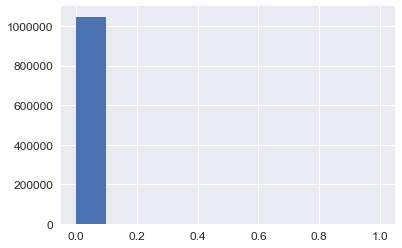

In [245]:
principalDf['isFraud'].hist()

In [145]:
df2.head()

,,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,...,Syria,São Tomé-et-Príncipe,Taiwan,Tanzania,Thailand,Turkey,USA,Vietnam,Yemen,isFraud
nameOrig,nameDest,,,,,,,,,,,,,,,,,,,,,
C1231006815,M1979787155,0.001,0.004,0.004,0.000,0.000,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
C1666544295,M2044282225,0.000,0.001,0.000,0.000,0.000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
C1305486145,C553264065,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
C840083671,C38997010,0.000,0.000,0.000,0.001,0.000,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
C2048537720,M1230701703,0.001,0.001,0.001,0.000,0.000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Keras implementation

In [326]:
X_train, X_test = train_test_split(principalDf, test_size=0.3, random_state=RANDOM_SEED)
X_train = X_train[X_train.isFraud == 0]


In [327]:
X_train.isFraud.unique()

array([0], dtype=int64)

In [328]:
X_train = X_train.drop(['isFraud'], axis=1)

In [329]:
X_train.shape

(733209, 100)

In [330]:
y_test = X_test['isFraud']

In [331]:
y_test.sum()

349

In [332]:
X_test = X_test.drop(['isFraud'], axis=1)

In [333]:
X_test.shape

(314573, 100)

In [334]:
X_train.shape

(733209, 100)

In [335]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
781974,-0.003,0.712,-0.397,0.169,1.047,-0.008,0.024,0.005,-0.040,-0.064,...,0.005,-0.018,-0.042,0.012,0.002,-0.014,-0.018,0.012,-0.025,-0.008
937737,-0.030,0.709,-0.405,0.945,-0.171,-0.025,-0.010,0.013,-0.020,-0.018,...,-0.078,-0.030,-0.059,0.012,-0.018,-0.003,-0.017,-0.018,-0.017,-0.028
907828,-0.030,0.710,-0.404,0.901,-0.156,-0.023,-0.014,0.009,0.004,-0.030,...,-0.097,-0.052,-0.084,-0.041,-0.040,-0.033,-0.066,-0.026,-0.006,-0.024
784628,-0.788,-0.035,0.748,-0.331,-0.077,-0.081,-0.641,-0.605,0.370,0.080,...,-0.029,-0.016,-0.044,-0.009,-0.008,-0.036,-0.018,-0.049,-0.029,-0.016
662460,0.618,0.008,0.893,-0.272,-0.072,0.003,0.033,0.010,-0.031,-0.029,...,0.015,-0.009,-0.036,0.020,0.000,-0.004,-0.027,-0.012,-0.011,0.000


In [336]:
X_train = X_train.values
X_test = X_test.values

In [337]:
X_train

array([[-0.78851194, -0.03329495,  0.74665262, ..., -0.03524096,
        -0.04421917, -0.01477129],
       [ 0.76499901, -0.67628669, -0.33524177, ..., -0.00134559,
        -0.01275701, -0.0189242 ],
       [-0.13767091, -0.01893298,  0.80411652, ..., -0.00359617,
        -0.02810587, -0.01321657],
       ...,
       [ 0.76439629, -0.67845681, -0.33598267, ..., -0.07959118,
        -0.06520438, -0.03561402],
       [ 0.6162093 ,  0.00581502,  0.89259234, ..., -0.05236805,
        -0.03532275, -0.04413622],
       [-0.78813759, -0.03527375,  0.74771425, ...,  0.00632857,
        -0.03299467, -0.00880576]])

## Set up the model

In [340]:
input_dim = X_train.shape[1]
encoding_dim = 100

input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="relu",activity_regularizer=regularizers.l1(0.0001))(input_layer)
 
                
encoder = Dense(int(encoding_dim - 20), activation="relu", activity_regularizer=regularizers.l1(0.0001))(encoder)
encoder = Dense(int(encoding_dim - 40), activation="relu", activity_regularizer=regularizers.l1(0.0001))(encoder)
encoder = Dense(int(encoding_dim - 60), activation="relu", activity_regularizer=regularizers.l1(0.0001))(encoder)
encoder = Dense(int(encoding_dim - 80), activation="relu", activity_regularizer=regularizers.l1(0.0001))(encoder)

decoder = Dense(int(encoding_dim - 80), activation='relu',activity_regularizer=regularizers.l1(0.0001))(encoder)
decoder = Dense(int(encoding_dim - 60), activation='relu',activity_regularizer=regularizers.l1(0.0001))(decoder)
decoder = Dense(int(encoding_dim - 40), activation='relu',activity_regularizer=regularizers.l1(0.0001))(decoder)
decoder = Dense(int(encoding_dim - 20), activation='relu',activity_regularizer=regularizers.l1(0.0001))(decoder)

decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [341]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 100)               0         
_________________________________________________________________
dense_181 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_182 (Dense)            (None, 80)                8080      
_________________________________________________________________
dense_183 (Dense)            (None, 60)                4860      
_________________________________________________________________
dense_184 (Dense)            (None, 40)                2440      
_________________________________________________________________
dense_185 (Dense)            (None, 20)                820       
_________________________________________________________________
dense_186 (Dense)            (None, 20)                420       
__________

In [342]:
adam = Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

## Train

In [343]:
nb_epoch = 10
batch_size = 500

autoencoder.compile(optimizer=adam, 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="ae1.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Train on 733209 samples, validate on 314573 samples
Epoch 1/10
322000/733209 [============>.................] - ETA: 5:36 - loss: 0.9423 - acc: 0.002 - ETA: 1:45 - loss: 0.9415 - acc: 0.004 - ETA: 1:11 - loss: 0.9393 - acc: 0.002 - ETA: 57s - loss: 0.9373 - acc: 0.002 - ETA: 49s - loss: 0.9361 - acc: 0.00 - ETA: 44s - loss: 0.9337 - acc: 0.00 - ETA: 41s - loss: 0.9318 - acc: 0.00 - ETA: 39s - loss: 0.9297 - acc: 0.00 - ETA: 37s - loss: 0.9278 - acc: 0.00 - ETA: 36s - loss: 0.9265 - acc: 0.00 - ETA: 34s - loss: 0.9247 - acc: 0.00 - ETA: 33s - loss: 0.9238 - acc: 0.00 - ETA: 33s - loss: 0.9222 - acc: 0.00 - ETA: 31s - loss: 0.9205 - acc: 0.00 - ETA: 31s - loss: 0.9196 - acc: 0.00 - ETA: 31s - loss: 0.9180 - acc: 0.00 - ETA: 30s - loss: 0.9168 - acc: 0.00 - ETA: 30s - loss: 0.9153 - acc: 0.00 - ETA: 29s - loss: 0.9136 - acc: 0.00 - ETA: 29s - loss: 0.9125 - acc: 0.00 - ETA: 28s - loss: 0.9109 - acc: 0.00 - ETA: 28s - loss: 0.9099 - acc: 0.00 - ETA: 28s - loss: 0.9083 - acc: 0.00 - ETA: 27

319000/733209 [============>.................] - ETA: 54s - loss: 0.4382 - acc: 0.19 - ETA: 33s - loss: 0.4386 - acc: 0.18 - ETA: 29s - loss: 0.4382 - acc: 0.18 - ETA: 31s - loss: 0.4381 - acc: 0.18 - ETA: 31s - loss: 0.4381 - acc: 0.17 - ETA: 30s - loss: 0.4384 - acc: 0.17 - ETA: 29s - loss: 0.4388 - acc: 0.17 - ETA: 29s - loss: 0.4381 - acc: 0.17 - ETA: 29s - loss: 0.4380 - acc: 0.17 - ETA: 28s - loss: 0.4374 - acc: 0.17 - ETA: 28s - loss: 0.4371 - acc: 0.17 - ETA: 29s - loss: 0.4364 - acc: 0.17 - ETA: 29s - loss: 0.4363 - acc: 0.17 - ETA: 29s - loss: 0.4364 - acc: 0.17 - ETA: 29s - loss: 0.4363 - acc: 0.17 - ETA: 29s - loss: 0.4364 - acc: 0.17 - ETA: 29s - loss: 0.4363 - acc: 0.18 - ETA: 29s - loss: 0.4361 - acc: 0.18 - ETA: 28s - loss: 0.4356 - acc: 0.17 - ETA: 28s - loss: 0.4352 - acc: 0.17 - ETA: 29s - loss: 0.4351 - acc: 0.17 - ETA: 29s - loss: 0.4349 - acc: 0.18 - ETA: 30s - loss: 0.4349 - acc: 0.17 - ETA: 30s - loss: 0.4347 - acc: 0.16 - ETA: 30s - loss: 0.4346 - acc: 0.16 - E

733209/733209 [==============================] - ETA: 1s - loss: 0.3650 - acc: 0.068 - ETA: 0s - loss: 0.3649 - acc: 0.068 - ETA: 0s - loss: 0.3648 - acc: 0.068 - ETA: 0s - loss: 0.3647 - acc: 0.068 - ETA: 0s - loss: 0.3645 - acc: 0.068 - ETA: 0s - loss: 0.3644 - acc: 0.068 - ETA: 0s - loss: 0.3643 - acc: 0.067 - ETA: 0s - loss: 0.3641 - acc: 0.067 - ETA: 0s - loss: 0.3640 - acc: 0.067 - ETA: 0s - loss: 0.3639 - acc: 0.067 - ETA: 0s - loss: 0.3637 - acc: 0.067 - ETA: 0s - loss: 0.3636 - acc: 0.067 - ETA: 0s - loss: 0.3635 - acc: 0.067 - ETA: 0s - loss: 0.3633 - acc: 0.067 - ETA: 0s - loss: 0.3632 - acc: 0.066 - ETA: 0s - loss: 0.3631 - acc: 0.066 - ETA: 0s - loss: 0.3629 - acc: 0.066 - ETA: 0s - loss: 0.3628 - acc: 0.066 - 29s 39us/step - loss: 0.3626 - acc: 0.0664 - val_loss: 0.3030 - val_acc: 0.0116
Epoch 3/10
366000/733209 [=============>................] - ETA: 1:00 - loss: 0.3004 - acc: 0.008 - ETA: 31s - loss: 0.3033 - acc: 0.012 - ETA: 28s - loss: 0.3025 - acc: 0.01 - ETA: 27s -

320500/733209 [============>.................] - ETA: 1:10 - loss: 0.2234 - acc: 0.004 - ETA: 36s - loss: 0.2265 - acc: 0.011 - ETA: 31s - loss: 0.2257 - acc: 0.01 - ETA: 28s - loss: 0.2257 - acc: 0.00 - ETA: 27s - loss: 0.2253 - acc: 0.00 - ETA: 26s - loss: 0.2254 - acc: 0.00 - ETA: 25s - loss: 0.2254 - acc: 0.00 - ETA: 25s - loss: 0.2257 - acc: 0.00 - ETA: 25s - loss: 0.2253 - acc: 0.00 - ETA: 25s - loss: 0.2251 - acc: 0.00 - ETA: 25s - loss: 0.2251 - acc: 0.00 - ETA: 24s - loss: 0.2250 - acc: 0.00 - ETA: 24s - loss: 0.2248 - acc: 0.00 - ETA: 24s - loss: 0.2246 - acc: 0.00 - ETA: 24s - loss: 0.2246 - acc: 0.00 - ETA: 24s - loss: 0.2246 - acc: 0.00 - ETA: 24s - loss: 0.2244 - acc: 0.00 - ETA: 24s - loss: 0.2244 - acc: 0.00 - ETA: 24s - loss: 0.2244 - acc: 0.00 - ETA: 24s - loss: 0.2243 - acc: 0.00 - ETA: 24s - loss: 0.2242 - acc: 0.00 - ETA: 23s - loss: 0.2242 - acc: 0.00 - ETA: 23s - loss: 0.2241 - acc: 0.00 - ETA: 23s - loss: 0.2240 - acc: 0.00 - ETA: 23s - loss: 0.2239 - acc: 0.00 

733209/733209 [==============================] - ETA: 3s - loss: 0.1974 - acc: 0.008 - ETA: 3s - loss: 0.1973 - acc: 0.008 - ETA: 2s - loss: 0.1972 - acc: 0.008 - ETA: 2s - loss: 0.1972 - acc: 0.008 - ETA: 2s - loss: 0.1971 - acc: 0.008 - ETA: 2s - loss: 0.1970 - acc: 0.008 - ETA: 2s - loss: 0.1970 - acc: 0.008 - ETA: 2s - loss: 0.1969 - acc: 0.008 - ETA: 2s - loss: 0.1968 - acc: 0.008 - ETA: 2s - loss: 0.1967 - acc: 0.008 - ETA: 2s - loss: 0.1967 - acc: 0.008 - ETA: 2s - loss: 0.1966 - acc: 0.008 - ETA: 2s - loss: 0.1966 - acc: 0.008 - ETA: 2s - loss: 0.1965 - acc: 0.008 - ETA: 2s - loss: 0.1964 - acc: 0.008 - ETA: 2s - loss: 0.1964 - acc: 0.008 - ETA: 2s - loss: 0.1963 - acc: 0.008 - ETA: 2s - loss: 0.1962 - acc: 0.008 - ETA: 1s - loss: 0.1962 - acc: 0.008 - ETA: 1s - loss: 0.1961 - acc: 0.008 - ETA: 1s - loss: 0.1961 - acc: 0.008 - ETA: 1s - loss: 0.1960 - acc: 0.008 - ETA: 1s - loss: 0.1959 - acc: 0.008 - ETA: 1s - loss: 0.1958 - acc: 0.008 - ETA: 1s - loss: 0.1958 - acc: 0.008 - E

358000/733209 [=============>................] - ETA: 49s - loss: 0.1149 - acc: 0.03 - ETA: 28s - loss: 0.1144 - acc: 0.03 - ETA: 28s - loss: 0.1139 - acc: 0.03 - ETA: 26s - loss: 0.1141 - acc: 0.03 - ETA: 26s - loss: 0.1139 - acc: 0.03 - ETA: 25s - loss: 0.1140 - acc: 0.03 - ETA: 25s - loss: 0.1138 - acc: 0.03 - ETA: 24s - loss: 0.1137 - acc: 0.03 - ETA: 24s - loss: 0.1135 - acc: 0.03 - ETA: 24s - loss: 0.1135 - acc: 0.03 - ETA: 24s - loss: 0.1135 - acc: 0.03 - ETA: 23s - loss: 0.1134 - acc: 0.03 - ETA: 23s - loss: 0.1132 - acc: 0.03 - ETA: 23s - loss: 0.1133 - acc: 0.03 - ETA: 23s - loss: 0.1132 - acc: 0.03 - ETA: 23s - loss: 0.1132 - acc: 0.03 - ETA: 23s - loss: 0.1132 - acc: 0.03 - ETA: 23s - loss: 0.1131 - acc: 0.03 - ETA: 23s - loss: 0.1131 - acc: 0.03 - ETA: 23s - loss: 0.1130 - acc: 0.03 - ETA: 23s - loss: 0.1130 - acc: 0.03 - ETA: 23s - loss: 0.1129 - acc: 0.03 - ETA: 22s - loss: 0.1129 - acc: 0.03 - ETA: 22s - loss: 0.1128 - acc: 0.03 - ETA: 22s - loss: 0.1127 - acc: 0.03 - E

721500/733209 [============================>.] - ETA: 12s - loss: 0.1037 - acc: 0.03 - ETA: 12s - loss: 0.1036 - acc: 0.03 - ETA: 12s - loss: 0.1036 - acc: 0.03 - ETA: 12s - loss: 0.1036 - acc: 0.03 - ETA: 12s - loss: 0.1035 - acc: 0.03 - ETA: 12s - loss: 0.1035 - acc: 0.03 - ETA: 12s - loss: 0.1034 - acc: 0.03 - ETA: 12s - loss: 0.1034 - acc: 0.03 - ETA: 12s - loss: 0.1033 - acc: 0.03 - ETA: 12s - loss: 0.1033 - acc: 0.03 - ETA: 12s - loss: 0.1032 - acc: 0.03 - ETA: 12s - loss: 0.1032 - acc: 0.03 - ETA: 12s - loss: 0.1031 - acc: 0.03 - ETA: 11s - loss: 0.1031 - acc: 0.03 - ETA: 11s - loss: 0.1030 - acc: 0.03 - ETA: 11s - loss: 0.1030 - acc: 0.03 - ETA: 11s - loss: 0.1029 - acc: 0.03 - ETA: 11s - loss: 0.1029 - acc: 0.03 - ETA: 11s - loss: 0.1029 - acc: 0.03 - ETA: 11s - loss: 0.1028 - acc: 0.03 - ETA: 11s - loss: 0.1028 - acc: 0.03 - ETA: 11s - loss: 0.1027 - acc: 0.03 - ETA: 11s - loss: 0.1027 - acc: 0.03 - ETA: 11s - loss: 0.1027 - acc: 0.03 - ETA: 11s - loss: 0.1026 - acc: 0.03 - E

733209/733209 [==============================] - ETA: 0s - loss: 0.0943 - acc: 0.037 - ETA: 0s - loss: 0.0943 - acc: 0.037 - ETA: 0s - loss: 0.0942 - acc: 0.037 - ETA: 0s - loss: 0.0942 - acc: 0.037 - ETA: 0s - loss: 0.0941 - acc: 0.037 - ETA: 0s - loss: 0.0941 - acc: 0.037 - 27s 37us/step - loss: 0.0941 - acc: 0.0371 - val_loss: 0.0762 - val_acc: 0.0368
Epoch 7/10
386500/733209 [==============>...............] - ETA: 1:20 - loss: 0.0773 - acc: 0.036 - ETA: 39s - loss: 0.0765 - acc: 0.037 - ETA: 29s - loss: 0.0761 - acc: 0.03 - ETA: 27s - loss: 0.0760 - acc: 0.03 - ETA: 25s - loss: 0.0760 - acc: 0.03 - ETA: 24s - loss: 0.0759 - acc: 0.03 - ETA: 25s - loss: 0.0759 - acc: 0.03 - ETA: 25s - loss: 0.0759 - acc: 0.03 - ETA: 25s - loss: 0.0759 - acc: 0.03 - ETA: 26s - loss: 0.0759 - acc: 0.03 - ETA: 26s - loss: 0.0758 - acc: 0.03 - ETA: 26s - loss: 0.0758 - acc: 0.03 - ETA: 26s - loss: 0.0757 - acc: 0.03 - ETA: 25s - loss: 0.0757 - acc: 0.03 - ETA: 25s - loss: 0.0756 - acc: 0.03 - ETA: 25s -

413500/733209 [===============>..............] - ETA: 52s - loss: 0.0530 - acc: 0.04 - ETA: 27s - loss: 0.0522 - acc: 0.04 - ETA: 26s - loss: 0.0519 - acc: 0.03 - ETA: 25s - loss: 0.0518 - acc: 0.04 - ETA: 24s - loss: 0.0518 - acc: 0.03 - ETA: 24s - loss: 0.0518 - acc: 0.03 - ETA: 23s - loss: 0.0518 - acc: 0.03 - ETA: 23s - loss: 0.0518 - acc: 0.03 - ETA: 23s - loss: 0.0517 - acc: 0.03 - ETA: 22s - loss: 0.0517 - acc: 0.03 - ETA: 22s - loss: 0.0517 - acc: 0.03 - ETA: 22s - loss: 0.0516 - acc: 0.03 - ETA: 22s - loss: 0.0516 - acc: 0.03 - ETA: 22s - loss: 0.0516 - acc: 0.03 - ETA: 21s - loss: 0.0516 - acc: 0.03 - ETA: 21s - loss: 0.0515 - acc: 0.03 - ETA: 21s - loss: 0.0515 - acc: 0.03 - ETA: 21s - loss: 0.0514 - acc: 0.03 - ETA: 21s - loss: 0.0514 - acc: 0.03 - ETA: 21s - loss: 0.0514 - acc: 0.03 - ETA: 21s - loss: 0.0514 - acc: 0.03 - ETA: 21s - loss: 0.0514 - acc: 0.03 - ETA: 21s - loss: 0.0514 - acc: 0.03 - ETA: 21s - loss: 0.0513 - acc: 0.03 - ETA: 21s - loss: 0.0513 - acc: 0.03 - E

733209/733209 [==============================] - ETA: 9s - loss: 0.0473 - acc: 0.037 - ETA: 9s - loss: 0.0473 - acc: 0.037 - ETA: 9s - loss: 0.0472 - acc: 0.037 - ETA: 9s - loss: 0.0472 - acc: 0.037 - ETA: 9s - loss: 0.0472 - acc: 0.037 - ETA: 9s - loss: 0.0472 - acc: 0.037 - ETA: 9s - loss: 0.0472 - acc: 0.037 - ETA: 9s - loss: 0.0472 - acc: 0.037 - ETA: 9s - loss: 0.0471 - acc: 0.037 - ETA: 9s - loss: 0.0471 - acc: 0.037 - ETA: 8s - loss: 0.0471 - acc: 0.037 - ETA: 8s - loss: 0.0471 - acc: 0.037 - ETA: 8s - loss: 0.0471 - acc: 0.037 - ETA: 8s - loss: 0.0470 - acc: 0.037 - ETA: 8s - loss: 0.0470 - acc: 0.037 - ETA: 8s - loss: 0.0470 - acc: 0.037 - ETA: 8s - loss: 0.0470 - acc: 0.037 - ETA: 8s - loss: 0.0470 - acc: 0.037 - ETA: 8s - loss: 0.0469 - acc: 0.037 - ETA: 8s - loss: 0.0469 - acc: 0.037 - ETA: 8s - loss: 0.0469 - acc: 0.037 - ETA: 8s - loss: 0.0469 - acc: 0.037 - ETA: 8s - loss: 0.0469 - acc: 0.037 - ETA: 8s - loss: 0.0469 - acc: 0.037 - ETA: 8s - loss: 0.0468 - acc: 0.037 - E

370000/733209 [==============>...............] - ETA: 54s - loss: 0.0343 - acc: 0.04 - ETA: 32s - loss: 0.0344 - acc: 0.04 - ETA: 29s - loss: 0.0342 - acc: 0.04 - ETA: 27s - loss: 0.0342 - acc: 0.03 - ETA: 26s - loss: 0.0341 - acc: 0.04 - ETA: 25s - loss: 0.0341 - acc: 0.03 - ETA: 25s - loss: 0.0341 - acc: 0.03 - ETA: 25s - loss: 0.0340 - acc: 0.03 - ETA: 24s - loss: 0.0341 - acc: 0.03 - ETA: 24s - loss: 0.0341 - acc: 0.03 - ETA: 24s - loss: 0.0341 - acc: 0.03 - ETA: 24s - loss: 0.0341 - acc: 0.03 - ETA: 24s - loss: 0.0341 - acc: 0.03 - ETA: 24s - loss: 0.0341 - acc: 0.03 - ETA: 24s - loss: 0.0341 - acc: 0.03 - ETA: 24s - loss: 0.0341 - acc: 0.03 - ETA: 24s - loss: 0.0341 - acc: 0.03 - ETA: 23s - loss: 0.0341 - acc: 0.03 - ETA: 23s - loss: 0.0341 - acc: 0.03 - ETA: 23s - loss: 0.0341 - acc: 0.03 - ETA: 23s - loss: 0.0341 - acc: 0.03 - ETA: 23s - loss: 0.0341 - acc: 0.03 - ETA: 23s - loss: 0.0341 - acc: 0.03 - ETA: 23s - loss: 0.0340 - acc: 0.03 - ETA: 23s - loss: 0.0340 - acc: 0.03 - E

733209/733209 [==============================] - ETA: 12s - loss: 0.0336 - acc: 0.03 - ETA: 12s - loss: 0.0336 - acc: 0.03 - ETA: 11s - loss: 0.0336 - acc: 0.03 - ETA: 11s - loss: 0.0336 - acc: 0.03 - ETA: 11s - loss: 0.0336 - acc: 0.03 - ETA: 11s - loss: 0.0336 - acc: 0.03 - ETA: 11s - loss: 0.0336 - acc: 0.03 - ETA: 11s - loss: 0.0336 - acc: 0.03 - ETA: 11s - loss: 0.0336 - acc: 0.03 - ETA: 11s - loss: 0.0336 - acc: 0.03 - ETA: 11s - loss: 0.0336 - acc: 0.03 - ETA: 11s - loss: 0.0336 - acc: 0.03 - ETA: 11s - loss: 0.0336 - acc: 0.03 - ETA: 11s - loss: 0.0336 - acc: 0.03 - ETA: 11s - loss: 0.0336 - acc: 0.03 - ETA: 11s - loss: 0.0336 - acc: 0.03 - ETA: 11s - loss: 0.0336 - acc: 0.03 - ETA: 11s - loss: 0.0336 - acc: 0.03 - ETA: 11s - loss: 0.0336 - acc: 0.03 - ETA: 11s - loss: 0.0336 - acc: 0.03 - ETA: 10s - loss: 0.0336 - acc: 0.03 - ETA: 10s - loss: 0.0336 - acc: 0.03 - ETA: 10s - loss: 0.0336 - acc: 0.03 - ETA: 10s - loss: 0.0336 - acc: 0.03 - ETA: 10s - loss: 0.0336 - acc: 0.03 - E

In [344]:
autoencoder = load_model('ae1.h5')


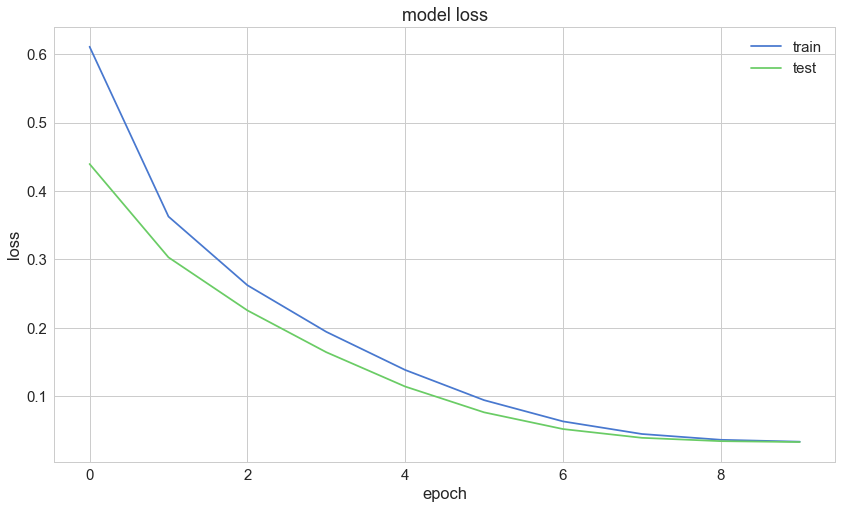

In [345]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [346]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

In [284]:
predictions = autoencoder.predict(X_test)

mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

error_df.describe()

,reconstruction_error,true_class
count,314573.000,314573.000
mean,0.033,0.001
std,0.003,0.033
min,0.012,0.000
25%,0.032,0.000
50%,0.032,0.000
75%,0.035,0.000
max,0.039,1.000


In [290]:
threshold = 0.02

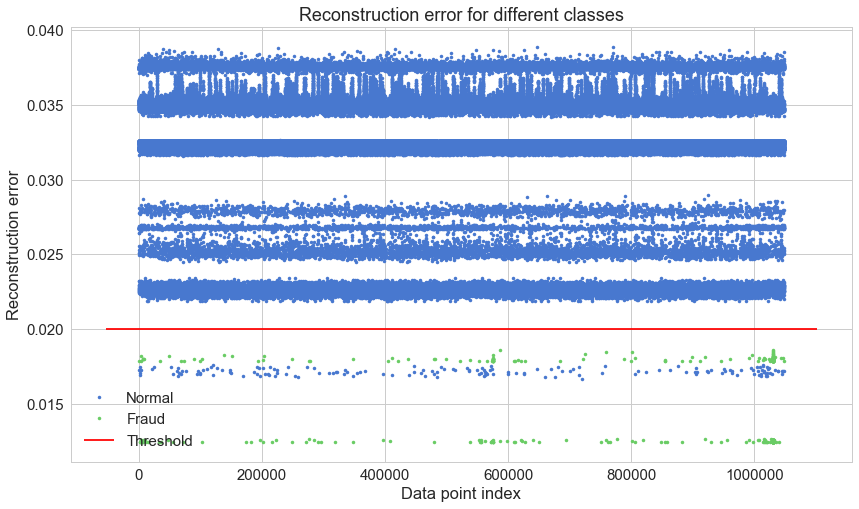

In [350]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= ("Fraud" if name == 1 else "Normal"))
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

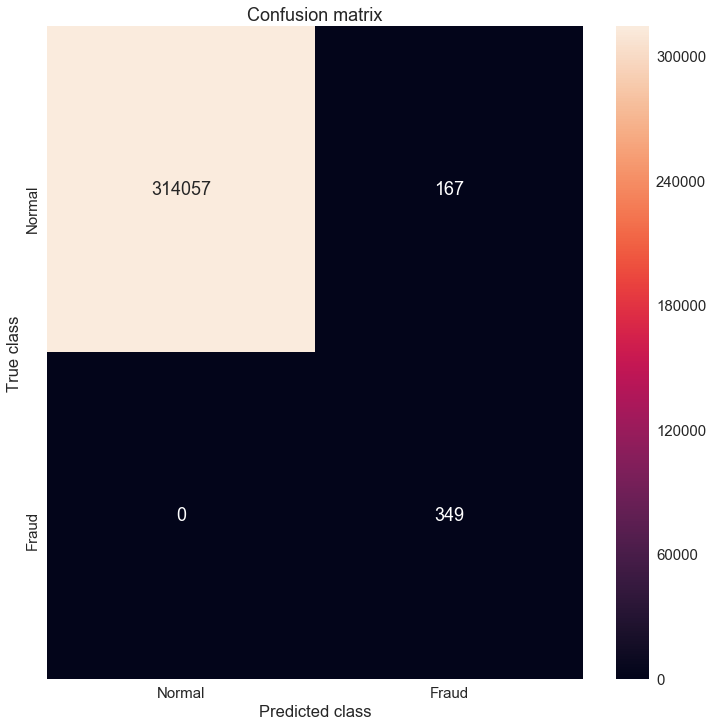

In [351]:
y_pred = [1 if e < threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()